In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jax.numpy as jnp

import appletree as apt
from appletree import randgen
from appletree.parameter import Parameter
from appletree.contexts import ERBand
from appletree.component import Component

In [2]:
apt.utils.set_gpu_memory_usage(0.2)

# Define parameters

In [3]:
par_config_file_name = '/home/zihaoxu/appletree/appletree/parameters/apt_sr0_er.json'
par_manager = Parameter(par_config_file_name)

In [4]:
# sample one set of parameters from initial guess
par_manager.sample_init()
parameters = par_manager.get_all_parameter()
print(parameters)

{'w': 0.013662644995673748, 'fano': 0.059, 'gas_gain': 31.3, 'drift_velocity': 0.0677, 's2_threshold': 500.0, 'field': 23.0, 'nex_ni_ratio': 0.11620852764294254, 'g1': 0.15150244724345108, 'g2': 15.777323753907705, 'p_dpe': 0.23921495847335383, 'py0': 0.14408075149226426, 'py1': 42.750437962434816, 'py2': -0.38949789257506784, 'py3': 1.0298848205328113, 'py4': 0.595628765884847, 'rf0': 0.020690900941486817, 'rf1': 0.40030863765897584}


# Regular meshgrid example

In [5]:
import multihist as mh
from matplotlib.colors import LogNorm

In [7]:
config = {
    'name' : 'er_sim',
    'axis' : ['cs1', 'cs2'],
    'bins': [jnp.linspace(0, 100, 50), jnp.logspace(2.6, 4, 50)],
    'bins_type' : 'meshgrid',
    'norm' : 1.0,
    'norm_type' : 'on_pdf',
    'sim' : ERBand,
    'sim_type' : 'context',
    'batch_size' : int(1e6)
}
er = Component(config)

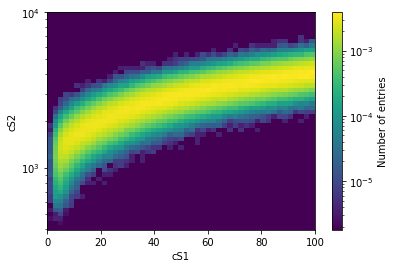

In [9]:
key = randgen.get_key()
key, h = er.simulate_hist(key, parameters)
h = mh.Histdd.from_histogram(np.array(h), config['bins'])

h.plot(norm=LogNorm())
plt.xlabel('cS1')
plt.ylabel('cS2')
plt.yscale('log')
plt.show()

In [10]:
@apt.timeit
def benchmark():
    for _ in range(100):
        key = randgen.get_key()
        er.simulate_hist(key, parameters)

In [11]:
benchmark()

 Function <benchmark> starts. 
 Function <benchmark> ends! Time cost = 639.636755 msec. 


# Equiprob example

In [12]:
data = pd.read_csv('./appletree/data/data_XENONnT_Rn220_v8_strax_v1.2.2_straxen_v1.7.1_cutax_v1.9.0.csv')

bins_cs1, bins_cs2 = apt.utils.get_equiprob_bins_2d(
    data[['cs1', 'cs2']].to_numpy(),
    [15, 15],
    order=[0, 1],
    x_clip=[0, 100],
    y_clip=[4e2, 1e4],
    which_np=jnp
)

config = {
    'name' : 'er_sim',
    'axis' : ['cs1', 'cs2'],
    'bins': [bins_cs1, bins_cs2],
    'bins_type' : 'irreg',
    'norm' : 1.0,
    'norm_type' : 'on_pdf',
    'sim' : ERBand,
    'sim_type' : 'context',
    'batch_size' : int(1e6)
}
er = Component(config)

/home/zihaoxu/appletree/appletree/context.py:187: UserWarning: function name er_sim is already cached. Running compile() will overwrite it.
  warn(warning)


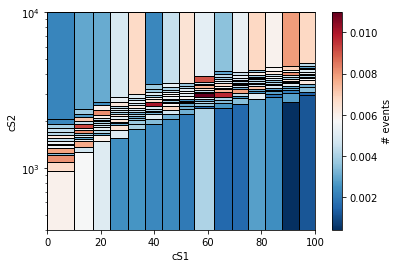

In [13]:
key, h = er.simulate_hist(key, parameters)

apt.utils.plot_irreg_histogram_2d(bins_cs1, bins_cs2, h)
plt.xlabel('cS1')
plt.ylabel('cS2')
plt.yscale('log')
plt.show()

In [14]:
@apt.timeit
def benchmark():
    for _ in range(100):
        key = randgen.get_key()
        er.simulate_hist(key, parameters)

In [15]:
benchmark()

 Function <benchmark> starts. 
 Function <benchmark> ends! Time cost = 640.709400 msec. 
